# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days. 

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd

## Get Data

In [2]:
from jupyter_workflow.data import get_fremont_data
data = get_fremont_data()

<AxesSubplot:xlabel='time'>

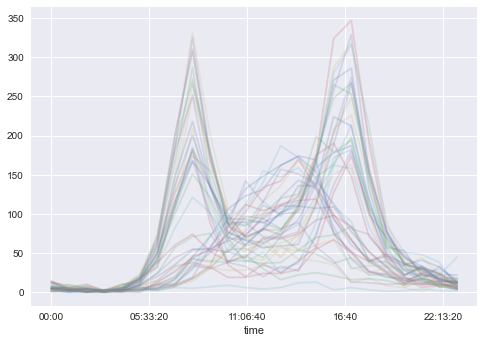

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.2)

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(42, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(42, 2)

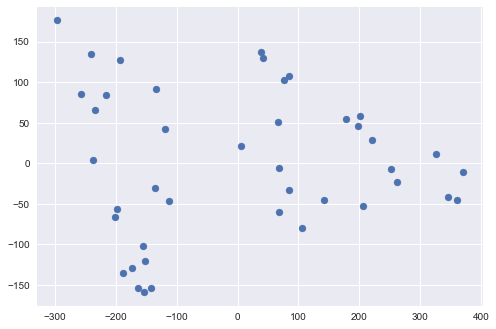

In [6]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

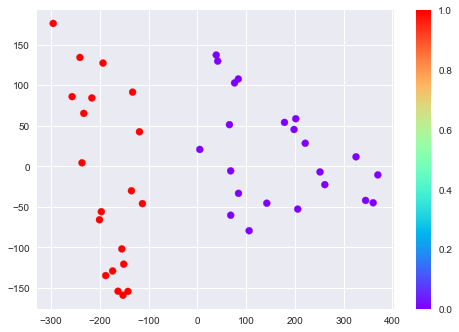

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Purple Cluster')

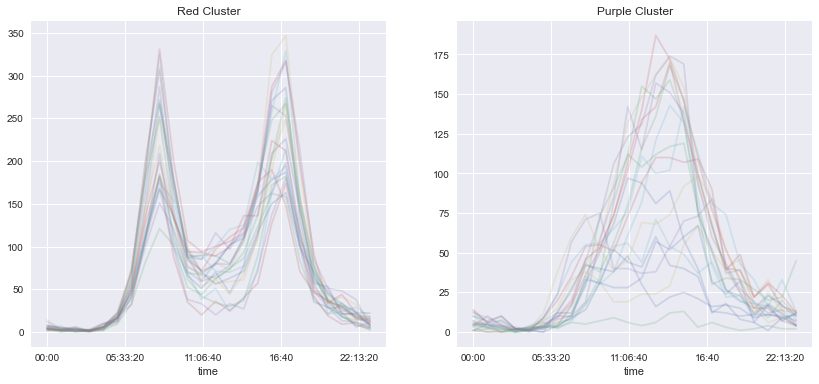

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.2, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.2, ax=ax[1])

# titles may be incorrect ?
ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster')

## Comparing With Day of Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

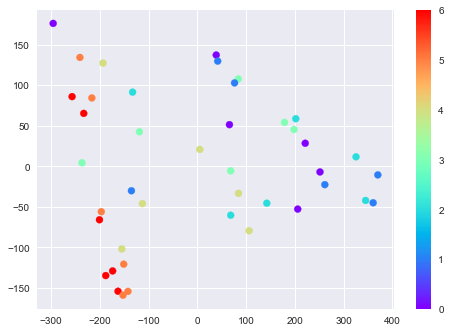

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2023-11-23', '2023-11-24', '2023-12-22', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', freq=None)